In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/CINGULATE_right/16-18-46_176"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,10.861493,-25.452356,-17.722559,12.979147,2.594467,-1.966175,-14.811613,-8.456345,26.272303,7.550975,...,-9.040921,16.948633,17.617998,0.025364,5.224460,5.073823,-16.522104,27.555405,-0.044473,25.957610
sub-1000458,7.190226,-12.151340,13.057828,-23.238022,0.899635,-3.190798,4.578502,8.307644,47.748287,-9.700775,...,-7.347115,-17.076601,4.081814,-6.420259,11.714687,2.993500,-10.411158,-13.271972,-15.340281,11.467621
sub-1000575,-12.068229,-5.911314,0.119280,19.694944,-2.510854,4.868907,-4.583453,-1.424402,-2.283638,-8.004563,...,-2.371945,-9.448652,-5.415300,-10.583063,-10.354674,-25.001637,10.974453,-38.668430,3.171974,16.260775
sub-1000606,-0.489287,-1.776471,-2.362469,-6.874474,3.821494,-6.082365,-3.858770,-42.311560,25.916767,17.080643,...,-3.042417,14.035638,-14.642318,8.825257,-23.739517,-17.541040,-20.637997,32.331670,1.666823,-10.682402
sub-1000963,5.618343,17.783830,-3.422063,-0.590644,2.910735,-25.145937,12.805270,-4.368909,12.117447,-23.266605,...,31.433403,-1.438764,-13.278314,3.810489,-7.629683,3.309425,-2.628899,-2.370109,-1.307378,12.151412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-6.065679,-35.818848,-3.731178,9.949704,-17.060478,-10.227982,-14.124343,-26.609734,4.927097,20.685530,...,1.080619,-21.391813,16.821564,-13.531563,-0.634192,-10.297783,10.884201,30.552483,-6.651351,9.342092
sub-6023808,8.528331,-26.598026,-3.990873,21.273106,-5.474471,-5.558226,-4.204331,-21.560180,23.901064,2.379967,...,-6.669702,-4.496566,-5.501221,-4.301307,-11.547366,-15.228116,-6.424103,36.320990,3.903257,25.730782
sub-6023847,8.241694,-39.948772,10.478790,-6.814939,-0.064649,0.082316,-5.430319,-15.905173,36.903492,7.000581,...,-5.585844,14.618613,2.537586,20.880106,1.119346,-2.977473,-24.255957,22.378622,0.549503,8.746752


# UKBioBank

In [4]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [5]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,10.861493,-25.452356,-17.722559,12.979147,2.594467,-1.966175,-14.811613,-8.456345,26.272303,7.550975,...,-9.040921,16.948633,17.617998,0.025364,5.224460,5.073823,-16.522104,27.555405,-0.044473,25.957610
sub-1000458,7.190226,-12.151340,13.057828,-23.238022,0.899635,-3.190798,4.578502,8.307644,47.748287,-9.700775,...,-7.347115,-17.076601,4.081814,-6.420259,11.714687,2.993500,-10.411158,-13.271972,-15.340281,11.467621
sub-1000575,-12.068229,-5.911314,0.119280,19.694944,-2.510854,4.868907,-4.583453,-1.424402,-2.283638,-8.004563,...,-2.371945,-9.448652,-5.415300,-10.583063,-10.354674,-25.001637,10.974453,-38.668430,3.171974,16.260775
sub-1000606,-0.489287,-1.776471,-2.362469,-6.874474,3.821494,-6.082365,-3.858770,-42.311560,25.916767,17.080643,...,-3.042417,14.035638,-14.642318,8.825257,-23.739517,-17.541040,-20.637997,32.331670,1.666823,-10.682402
sub-1000963,5.618343,17.783830,-3.422063,-0.590644,2.910735,-25.145937,12.805270,-4.368909,12.117447,-23.266605,...,31.433403,-1.438764,-13.278314,3.810489,-7.629683,3.309425,-2.628899,-2.370109,-1.307378,12.151412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-6.065679,-35.818848,-3.731178,9.949704,-17.060478,-10.227982,-14.124343,-26.609734,4.927097,20.685530,...,1.080619,-21.391813,16.821564,-13.531563,-0.634192,-10.297783,10.884201,30.552483,-6.651351,9.342092
sub-6023808,8.528331,-26.598026,-3.990873,21.273106,-5.474471,-5.558226,-4.204331,-21.560180,23.901064,2.379967,...,-6.669702,-4.496566,-5.501221,-4.301307,-11.547366,-15.228116,-6.424103,36.320990,3.903257,25.730782
sub-6023847,8.241694,-39.948772,10.478790,-6.814939,-0.064649,0.082316,-5.430319,-15.905173,36.903492,7.000581,...,-5.585844,14.618613,2.537586,20.880106,1.119346,-2.977473,-24.255957,22.378622,0.549503,8.746752


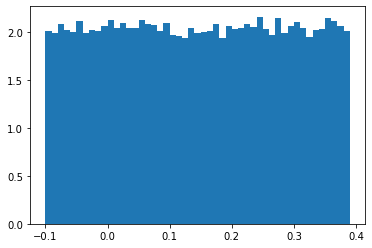

In [6]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

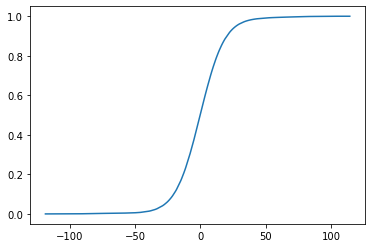

In [7]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [8]:
X2[int(N*0.59)]

3.257717

In [9]:
len(ukb_emb)

21052

In [10]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [11]:
ukb_positive

dim70     1.000000
dim121    1.000000
dim221    0.940006
dim79     0.931313
dim244    0.926183
            ...   
dim20     0.055149
dim197    0.053012
dim210    0.034249
dim66     0.013205
dim97     0.000000
Length: 256, dtype: float64

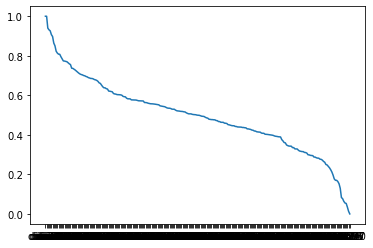

In [12]:
plt.plot(ukb_positive)

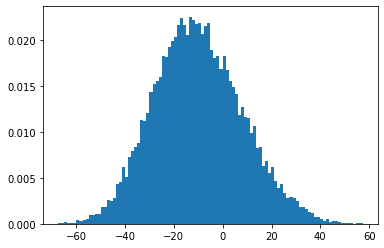

In [13]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

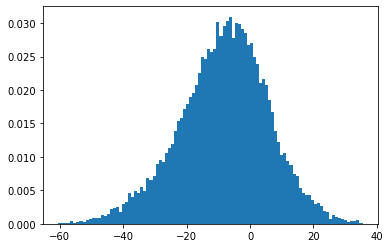

In [14]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [15]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [16]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [17]:
umap_ukb = visual_ukb_emb

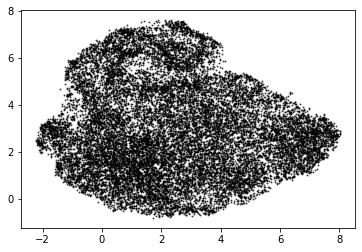

In [18]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [19]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=1000)

In [20]:
global_id.dimension_

9.375196632245684

In [21]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [22]:
# lid_mom.dimension_

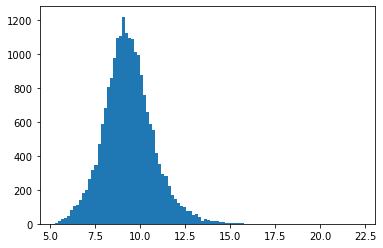

In [23]:

h = plt.hist(global_id.dimension_pw_, bins=100)

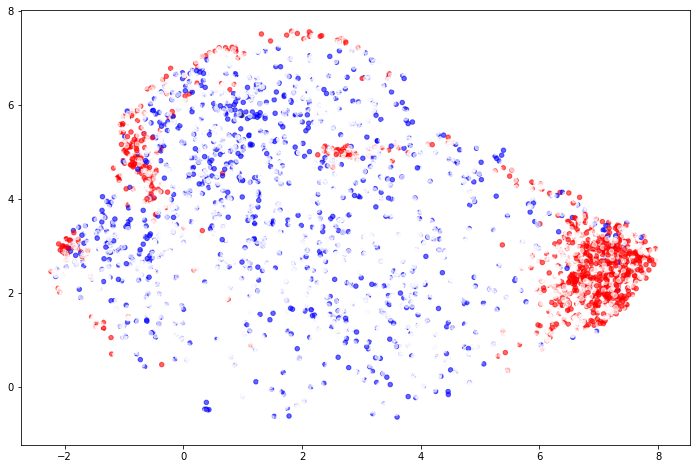

In [28]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [25]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(ukb_emb)

In [29]:
distances, indices = nbrs.kneighbors(ukb_emb)

In [30]:
distances.shape

(21052, 2)

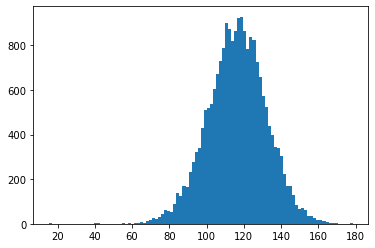

In [31]:
h = plt.hist(distances[:,1], bins=100)

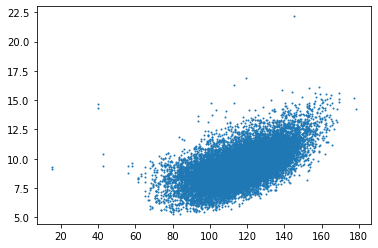

In [32]:
plt.scatter(distances[:,1], global_id.dimension_pw_, s=1)

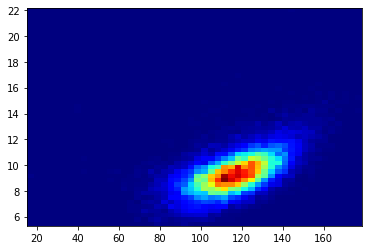

In [33]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()